# Prepare the dataset

In [1]:
import anndata as ad
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams
import numpy as np
import muon

In [2]:
scglue

<module 'scglue' from '/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/site-packages/scglue/__init__.py'>

In [3]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/cpsc_finalproject/genept_data/GenePT/pbmc3k5kciteseq.h5ad")

/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata

AnnData object with n_obs × n_vars = 10849 × 15792
    obs: 'n_genes', 'percent_mito', 'n_counts', 'batch'
    obsm: 'protein_expression'

In [5]:
adata.obsm['protein_expression']

,CD3_TotalSeqB,CD4_TotalSeqB,CD8a_TotalSeqB,CD14_TotalSeqB,CD15_TotalSeqB,CD16_TotalSeqB,CD56_TotalSeqB,CD19_TotalSeqB,CD25_TotalSeqB,CD45RA_TotalSeqB,CD45RO_TotalSeqB,PD-1_TotalSeqB,TIGIT_TotalSeqB,CD127_TotalSeqB
index,,,,,,,,,,,,,,
AAACCCAAGATTGTGA-1,18,138,13,491,61,17,17,3,9,110,74,9,4,7
AAACCCACATCGGTTA-1,30,119,19,472,102,155,248,3,5,125,156,9,9,8
AAACCCAGTACCGCGT-1,18,207,10,1289,128,72,26,8,15,5268,28,20,11,12
AAACCCAGTATCGAAA-1,18,11,17,20,124,1227,491,5,15,4743,28,25,59,16
AAACCCAGTCGTCATA-1,5,14,14,19,156,1873,458,4,16,4108,21,28,76,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTACGAGTG-1,756,1237,2,6,11,0,4,4,3,302,11,5,0,60
TTTGTTGAGTTAACAG-1,21,219,12,475,9,4,1,7,8,25,44,7,1,2
TTTGTTGCAGCACAAG-1,693,9,737,15,6,1,2,1,6,57,69,34,14,7


In [6]:
# pip install mygene

In [7]:
rna = adata

In [8]:
prot = sc.AnnData(adata.obsm['protein_expression'], obs = adata.obs)

/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
prot.obs_names

Index(['AAACCCAAGATTGTGA-1', 'AAACCCACATCGGTTA-1', 'AAACCCAGTACCGCGT-1',
       'AAACCCAGTATCGAAA-1', 'AAACCCAGTCGTCATA-1', 'AAACCCAGTCTACACA-1',
       'AAACCCAGTGCAAGAC-1', 'AAACCCAGTGCATTTG-1', 'AAACCCATCCGATGTA-1',
       'AAACCCATCTCAACGA-1',
       ...
       'TTTGGAGCACTCATAG-1', 'TTTGGAGCAGCGGTTC-1', 'TTTGGTTCAAAGCGTG-1',
       'TTTGGTTGTAATGTGA-1', 'TTTGGTTGTACCTGTA-1', 'TTTGGTTGTACGAGTG-1',
       'TTTGTTGAGTTAACAG-1', 'TTTGTTGCAGCACAAG-1', 'TTTGTTGCAGTCTTCC-1',
       'TTTGTTGCATTGCCGG-1'],
      dtype='object', name='index', length=10849)

In [10]:
prot.var_names = [i.split('_')[0]+'prot' for i in prot.var_names] #rename the protein data to avoid conflict with genes

In [11]:
prot.var_names

Index(['CD3prot', 'CD4prot', 'CD8aprot', 'CD14prot', 'CD15prot', 'CD16prot',
       'CD56prot', 'CD19prot', 'CD25prot', 'CD45RAprot', 'CD45ROprot',
       'PD-1prot', 'TIGITprot', 'CD127prot'],
      dtype='object')

We provide an option to access the protien-gene network:

The service is based on: https://www.humanmine.org/humanmine/service

In [12]:
# pip install intermine

In [13]:
# An option to query the protein-gene matching
# from intermine.webservice import Service
# service = Service("https://www.humanmine.org/humanmine/service")

# # Get a new query on the class (table) you will be querying:
# query = service.new_query("Protein")

# # The view specifies the output columns
# query.add_view(
#     "primaryAccession", "genes.primaryIdentifier", "genes.symbol",
#     "genes.chromosome.primaryIdentifier", "genes.chromosomeLocation.start",
#     "genes.chromosomeLocation.end", "genes.chromosomeLocation.strand",
#     "genes.length"
# )

# # Uncomment and edit the line below (the default) to select a custom sort order:
# # query.add_sort_order("Protein.primaryAccession", "ASC")

# # You can edit the constraint values below
# query.add_constraint("Protein", "LOOKUP", "CD3", code="A")

# # Uncomment and edit the code below to specify your own custom logic:
# # query.set_logic("A")

# for row in query.rows():
#     print(row["primaryAccession"], row["genes.primaryIdentifier"], row["genes.symbol"], \
#         row["genes.chromosome.primaryIdentifier"], row["genes.chromosomeLocation.start"], \
#         row["genes.chromosomeLocation.end"], row["genes.chromosomeLocation.strand"], \
#         row["genes.length"])

In [14]:
# for row in query.rows():
#     print(row)

In [15]:
prot.var_names

Index(['CD3prot', 'CD4prot', 'CD8aprot', 'CD14prot', 'CD15prot', 'CD16prot',
       'CD56prot', 'CD19prot', 'CD25prot', 'CD45RAprot', 'CD45ROprot',
       'PD-1prot', 'TIGITprot', 'CD127prot'],
      dtype='object')

In [16]:
# Define the protein-gene network
protein_gene_match = {
                      'CD4prot':'CD4', 'CD8aprot':'CD8A'
                      , 'CD14prot':'CD14'
                      , 'CD15prot':'FUT4'
                      , 'CD16prot':'FCGR3A'
                      , 'CD56prot':'NCAM1'
                      , 'CD19prot':'CD19'
                      , 'CD25prot':'IL2RA'
                      ,'CD45RAprot':'PTPRC'
                      , 'PD-1prot':'PDCD1'
                      , 'TIGITprot':'TIGIT'
                      , 'CD127prot':'IL7R'}

In [17]:
protein_gene_match

{'CD4prot': 'CD4',
 'CD8aprot': 'CD8A',
 'CD14prot': 'CD14',
 'CD15prot': 'FUT4',
 'CD16prot': 'FCGR3A',
 'CD56prot': 'NCAM1',
 'CD19prot': 'CD19',
 'CD25prot': 'IL2RA',
 'CD45RAprot': 'PTPRC',
 'PD-1prot': 'PDCD1',
 'TIGITprot': 'TIGIT',
 'CD127prot': 'IL7R'}

In [18]:
rna.layers['counts'] = rna.X.copy()

In [19]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")
rna = rna[:,rna.var['highly_variable']]

In [20]:
rna

View of AnnData object with n_obs × n_vars = 10849 × 2000
    obs: 'n_genes', 'percent_mito', 'n_counts', 'batch'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    obsm: 'protein_expression'
    layers: 'counts'

In [21]:
overlap_list = sorted(set(rna.var_names).intersection(prot.var_names))

In [22]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=50, svd_solver="auto")

/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:
prot.X = prot.X.astype('float')

In [24]:
prot.layers['counts'] = prot.X

In [25]:
prot.layers['counts'] 

array([[1.800e+01, 1.380e+02, 1.300e+01, ..., 9.000e+00, 4.000e+00,
        7.000e+00],
       [3.000e+01, 1.190e+02, 1.900e+01, ..., 9.000e+00, 9.000e+00,
        8.000e+00],
       [1.800e+01, 2.070e+02, 1.000e+01, ..., 2.000e+01, 1.100e+01,
        1.200e+01],
       ...,
       [6.930e+02, 9.000e+00, 7.370e+02, ..., 3.400e+01, 1.400e+01,
        7.000e+00],
       [4.020e+02, 1.417e+03, 8.000e+00, ..., 1.100e+01, 2.000e+00,
        1.450e+02],
       [6.000e+00, 4.600e+01, 3.000e+00, ..., 3.000e+00, 1.000e+00,
        0.000e+00]])

In [26]:
import networkx as nx

In [27]:
guidance = scglue.genomics.generate_prot_guidance_graph(rna, prot, protein_gene_match)

In [28]:
# clr(prot)
# sc.pp.scale(prot)
# sc.tl.pca(prot)

In [29]:
guidance.edges

OutMultiEdgeView([('CD4prot', 'CD4', 0), ('CD4prot', 'CD4prot', 0), ('CD4', 'CD4prot', 0), ('CD4', 'CD4', 0), ('CD8aprot', 'CD8A', 0), ('CD8aprot', 'CD8aprot', 0), ('CD8A', 'CD8aprot', 0), ('CD8A', 'CD8A', 0), ('CD14prot', 'CD14', 0), ('CD14prot', 'CD14prot', 0), ('CD14', 'CD14prot', 0), ('CD14', 'CD14', 0), ('CD15prot', 'FUT4', 0), ('CD15prot', 'CD15prot', 0), ('FUT4', 'CD15prot', 0), ('CD16prot', 'FCGR3A', 0), ('CD16prot', 'CD16prot', 0), ('FCGR3A', 'CD16prot', 0), ('FCGR3A', 'FCGR3A', 0), ('CD56prot', 'NCAM1', 0), ('CD56prot', 'CD56prot', 0), ('NCAM1', 'CD56prot', 0), ('NCAM1', 'NCAM1', 0), ('CD19prot', 'CD19', 0), ('CD19prot', 'CD19prot', 0), ('CD19', 'CD19prot', 0), ('CD19', 'CD19', 0), ('CD25prot', 'IL2RA', 0), ('CD25prot', 'CD25prot', 0), ('IL2RA', 'CD25prot', 0), ('IL2RA', 'IL2RA', 0), ('CD45RAprot', 'PTPRC', 0), ('CD45RAprot', 'CD45RAprot', 0), ('PTPRC', 'CD45RAprot', 0), ('PD-1prot', 'PDCD1', 0), ('PD-1prot', 'PD-1prot', 0), ('PDCD1', 'PD-1prot', 0), ('TIGITprot', 'TIGIT', 0)

In [30]:
from itertools import chain

import anndata as ad
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

In [31]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [32]:
rna.obs_names

Index(['AAACCCAAGATTGTGA-1', 'AAACCCACATCGGTTA-1', 'AAACCCAGTACCGCGT-1',
       'AAACCCAGTATCGAAA-1', 'AAACCCAGTCGTCATA-1', 'AAACCCAGTCTACACA-1',
       'AAACCCAGTGCAAGAC-1', 'AAACCCAGTGCATTTG-1', 'AAACCCATCCGATGTA-1',
       'AAACCCATCTCAACGA-1',
       ...
       'TTTGGAGCACTCATAG-1', 'TTTGGAGCAGCGGTTC-1', 'TTTGGTTCAAAGCGTG-1',
       'TTTGGTTGTAATGTGA-1', 'TTTGGTTGTACCTGTA-1', 'TTTGGTTGTACGAGTG-1',
       'TTTGTTGAGTTAACAG-1', 'TTTGTTGCAGCACAAG-1', 'TTTGTTGCAGTCTTCC-1',
       'TTTGTTGCATTGCCGG-1'],
      dtype='object', name='index', length=10849)

In [33]:
prot.obs_names

Index(['AAACCCAAGATTGTGA-1', 'AAACCCACATCGGTTA-1', 'AAACCCAGTACCGCGT-1',
       'AAACCCAGTATCGAAA-1', 'AAACCCAGTCGTCATA-1', 'AAACCCAGTCTACACA-1',
       'AAACCCAGTGCAAGAC-1', 'AAACCCAGTGCATTTG-1', 'AAACCCATCCGATGTA-1',
       'AAACCCATCTCAACGA-1',
       ...
       'TTTGGAGCACTCATAG-1', 'TTTGGAGCAGCGGTTC-1', 'TTTGGTTCAAAGCGTG-1',
       'TTTGGTTGTAATGTGA-1', 'TTTGGTTGTACCTGTA-1', 'TTTGGTTGTACGAGTG-1',
       'TTTGTTGAGTTAACAG-1', 'TTTGTTGCAGCACAAG-1', 'TTTGTTGCAGTCTTCC-1',
       'TTTGTTGCATTGCCGG-1'],
      dtype='object', name='index', length=10849)

In [34]:
rna.obs_names_make_unique()

In [35]:
prot.obs_names_make_unique()

In [36]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca", use_obs_names=True, use_batch='batch'
)

In [48]:
scglue.models.configure_dataset(
    prot, "NBMixture", use_highly_variable=False,use_layer="counts", use_obs_names=True, use_batch='batch'
) # the default appraoch to model the ADT part of cite-seq is nbmixture model, referring from TOTALVI

[WARNING] configure_dataset: `configure_dataset` has already been called. Previous configuration will be overwritten!


We can also model the protein data based on normal distribution.

In [47]:
# muon.prot.pp.clr(prot) #need the clr preprocessing
# sc.pp.scale(prot)
# sc.tl.pca(prot)
# scglue.models.configure_dataset(
#     prot, "Normal", use_rep="X_pca", use_highly_variable=False, use_obs_names=True, use_batch='batch'
# )

In [39]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "atac": prot}, guidance,
    model=scglue.models.PairedSCGLUEModel,
    fit_kws={"directory": "glue_prot"}
)


[INFO] fit_SCGLUE: Pretraining SCGLUE model...


[WARNING] PairedSCGLUEModel: It is recommended that `use_rep` dimensionality be equal or larger than `latent_dim`.


Index(['AL645608.8', 'HES4', 'ISG15', 'TTLL10', 'TNFRSF18', 'TNFRSF4',
       'AL645728.1', 'MMP23B', 'NADK', 'AJAP1',
       ...
       'AIRE', 'COL6A2', 'S100B', 'MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-ATP8',
       'MT-ATP6', 'MT-CO3', 'MT-ND5'],
      dtype='object', name='index', length=2000)
[INFO] autodevice: Using GPU 0 as computation device.
[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...


/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
[WARNING] check_graph: Missing self-loop!


[INFO] check_graph: Checking graph symmetry...
[INFO] PairedSCGLUEModel: Setting `graph_batch_size` = 701
[INFO] PairedSCGLUEModel: Setting `max_epochs` = 315
[INFO] PairedSCGLUEModel: Setting `patience` = 27
[INFO] PairedSCGLUEModel: Setting `reduce_lr_patience` = 14
[INFO] PairedSCGLUETrainer: Using training directory: "glue_prot/pretrain"


/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


[INFO] PairedSCGLUETrainer: [Epoch 10] train={'g_nll': 0.439, 'g_kl': 0.06, 'g_elbo': 0.499, 'x_rna_nll': 0.421, 'x_rna_kl': 0.012, 'x_rna_elbo': 0.433, 'x_atac_nll': 1.033, 'x_atac_kl': 0.195, 'x_atac_elbo': 1.228, 'dsc_loss': 0.515, 'vae_loss': 1.758, 'gen_loss': 1.732, 'joint_cross_loss': 1.459, 'real_cross_loss': 1.881, 'cos_loss': 0.531}, val={'g_nll': 0.435, 'g_kl': 0.062, 'g_elbo': 0.497, 'x_rna_nll': 0.428, 'x_rna_kl': 0.011, 'x_rna_elbo': 0.439, 'x_atac_nll': 1.014, 'x_atac_kl': 0.17, 'x_atac_elbo': 1.184, 'dsc_loss': 0.497, 'vae_loss': 1.72, 'gen_loss': 1.695, 'joint_cross_loss': 1.447, 'real_cross_loss': 1.847, 'cos_loss': 0.531}, 5.4s elapsed
[INFO] PairedSCGLUETrainer: [Epoch 20] train={'g_nll': 0.39, 'g_kl': 0.083, 'g_elbo': 0.473, 'x_rna_nll': 0.399, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.407, 'x_atac_nll': 0.777, 'x_atac_kl': 0.311, 'x_atac_elbo': 1.088, 'dsc_loss': 0.579, 'vae_loss': 1.578, 'gen_loss': 1.549, 'joint_cross_loss': 1.153, 'real_cross_loss': 1.506, 'cos_loss':

2024-02-04 11:58:21,297 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "163"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...


2024-02-04 11:58:33.201140: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-04 11:58:33.293282: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 11:58:33.293330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 11:58:33.294468: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-04 11:58:33.313569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (24, 23)...
[INFO] estimate_balancing_weight: Estimating balancing weight...


/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...


[WARNING] PairedSCGLUEModel: It is recommended that `use_rep` dimensionality be equal or larger than `latent_dim`.


[INFO] check_graph: Checking variable coverage...
[INFO] check_graph: Checking edge attributes...
[INFO] check_graph: Checking self-loops...


/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
[WARNING] check_graph: Missing self-loop!


[INFO] check_graph: Checking graph symmetry...
[INFO] PairedSCGLUEModel: Setting `graph_batch_size` = 701
[INFO] PairedSCGLUEModel: Setting `align_burnin` = 53
[INFO] PairedSCGLUEModel: Setting `max_epochs` = 315
[INFO] PairedSCGLUEModel: Setting `patience` = 27
[INFO] PairedSCGLUEModel: Setting `reduce_lr_patience` = 14
[INFO] PairedSCGLUETrainer: Using training directory: "glue_prot/fine-tune"
[INFO] PairedSCGLUETrainer: [Epoch 10] train={'g_nll': 0.091, 'g_kl': 0.08, 'g_elbo': 0.171, 'x_rna_nll': 0.387, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.395, 'x_atac_nll': 0.616, 'x_atac_kl': 0.416, 'x_atac_elbo': 1.032, 'dsc_loss': 0.682, 'vae_loss': 1.485, 'gen_loss': 1.451, 'joint_cross_loss': 0.938, 'real_cross_loss': 1.142, 'cos_loss': 0.521}, val={'g_nll': 0.095, 'g_kl': 0.08, 'g_elbo': 0.175, 'x_rna_nll': 0.4, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.408, 'x_atac_nll': 0.599, 'x_atac_kl': 0.405, 'x_atac_elbo': 1.005, 'dsc_loss': 0.676, 'vae_loss': 1.471, 'gen_loss': 1.438, 'joint_cross_loss': 0.941

2024-02-04 12:05:20,260 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "104"...


In [40]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
prot.obsm["X_glue"] = glue.encode_data("atac", prot)

In [41]:
rna.obsm['X_comb'] = np.concatenate([rna.obsm["X_glue"], prot.obsm["X_glue"]], axis=1)

In [42]:
sc.pp.neighbors(rna, use_rep="X_comb", metric="cosine")
sc.tl.umap(rna)

/gpfs/gibbs/project/zhao/tl688/conda_envs/scglue/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


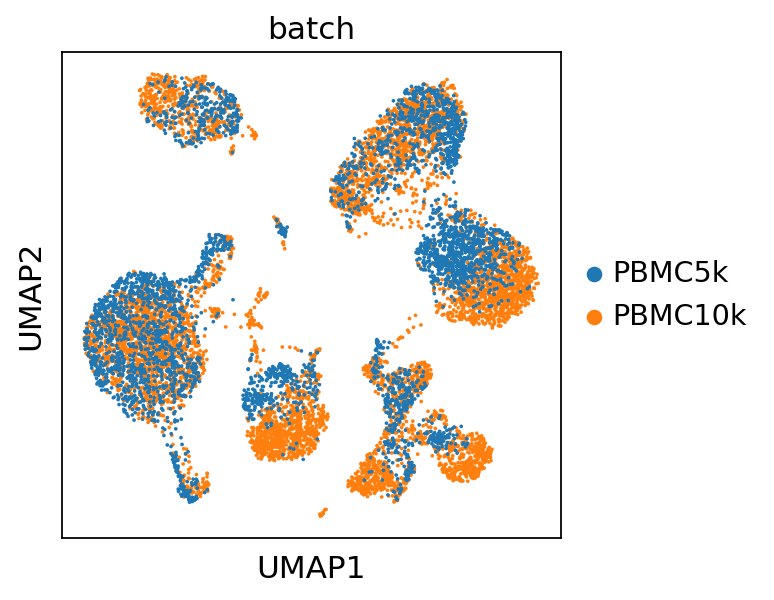

In [43]:
sc.pl.umap(rna, color=["batch"], wspace=0.65)

In [44]:
# sc.pl.umap(rna, color=["celltype.l2", "orig.ident"], wspace=0.65)

In [45]:
rna.obs

,n_genes,percent_mito,n_counts,batch,balancing_weight
index,,,,,
AAACCCAAGATTGTGA-1,2194,0.084903,6160.0,PBMC10k,1.141823
AAACCCACATCGGTTA-1,2093,0.061820,6713.0,PBMC10k,1.572584
AAACCCAGTACCGCGT-1,1518,0.078911,3637.0,PBMC10k,1.581676
AAACCCAGTATCGAAA-1,737,0.088424,1244.0,PBMC10k,0.871529
AAACCCAGTCGTCATA-1,1240,0.059747,2611.0,PBMC10k,0.871529
...,...,...,...,...,...
TTTGGTTGTACGAGTG-1,1450,0.064818,5662.0,PBMC5k,0.671456
TTTGTTGAGTTAACAG-1,3065,0.087742,10189.0,PBMC5k,0.976391
TTTGTTGCAGCACAAG-1,1641,0.098523,4740.0,PBMC5k,0.761896


In [46]:
rna.write_h5ad("glue_batchonly_prot_normal.h5ad")